In [116]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GroupShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso
from sklearn.metrics import mean_squared_error, r2_score#, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

In [47]:
xtrain_data = pd.read_csv(r'E:\Nextstep\PdM\Predictive-Maintenance\Datasets\ForModelDev\XTrain.csv')
ytrain_data = pd.read_csv(r'E:\Nextstep\PdM\Predictive-Maintenance\Datasets\ForModelDev\YTrain.csv')
engine_data = np.array(pd.read_csv(r'E:\Nextstep\PdM\Predictive-Maintenance\Datasets\ForModelDev\Engine.csv'))
xtest_data = pd.read_csv(r'E:\Nextstep\PdM\Predictive-Maintenance\Datasets\ForModelDev\XTest.csv')
ytest_data  = pd.read_csv(r'E:\Nextstep\PdM\Predictive-Maintenance\Datasets\ForModelDev\Ytest.csv')
engine_test_data = pd.read_csv(r'E:\Nextstep\PdM\Predictive-Maintenance\Datasets\ForModelDev\Engine_test.csv')

In [5]:
for i, (train_index, val_index) in enumerate(gss.split(xtrain_data, ytrain_data, engine_data)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}, group={np.unique(engine_data[train_index])}")
    print(f"  Test:  index={val_index}, group={np.unique(engine_data[val_index])}")

Fold 0:
  Train: index=[  192   193   194 ... 20628 20629 20630], group=[  2   3   4   6   7   8   9  12  14  15  17  18  20  21  22  24  25  26
  28  29  30  33  35  36  37  38  39  42  44  47  48  49  50  51  52  53
  55  57  58  59  60  61  62  63  64  65  66  67  68  69  72  75  76  79
  80  82  83  85  86  87  88  90  92  93  94  95  96  98  99 100]
  Test:  index=[    0     1     2 ... 20087 20088 20089], group=[ 1  5 10 11 13 16 19 23 27 31 32 34 40 41 43 45 46 54 56 70 71 73 74 77
 78 81 84 89 91 97]


# Model without CV

In [11]:
lr = LinearRegression()

In [18]:
lr.fit(xtrain_data, ytrain_data)
ypred = lr.predict(xtest_data)
print('RMSE: ' + str(np.sqrt(mean_squared_error(ytest_data, ypred))))
print('R2: ' + str(r2_score(ytest_data, ypred)))

RMSE: 43.18821684634371
R2: 0.4637682883334361


# Model with Cross Validation (KFold)

In [22]:
gss = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42) #n_splits refers to number of folds required
for i, (train_index, val_index) in enumerate(gss.split(xtrain_data, ytrain_data, engine_data)):
    xtrain = xtrain_data.loc[train_index]
    ytrain = ytrain_data.loc[train_index]
    xval = xtrain_data.loc[val_index]
    yval = ytrain_data.loc[val_index]
    lr.fit(xtrain, ytrain)
    ypred = lr.predict(xval)
    print('Set ' + str(i), end = ' ')
    print('RMSE: ' + str(np.sqrt(mean_squared_error(yval, ypred))), end = ' ')
    print('R2: ' + str(r2_score(yval, ypred)))

Set 0 RMSE: 34.69545781253898 R2: 0.7165034406492117
Set 1 RMSE: 42.38106877974548 R2: 0.6181809709321486
Set 2 RMSE: 34.9009602973066 R2: 0.714542256203726
Set 3 RMSE: 38.29019079301779 R2: 0.6903120066313061
Set 4 RMSE: 40.22812008666501 R2: 0.6725697396081816
Set 5 RMSE: 44.022622637337506 R2: 0.5654893719163739
Set 6 RMSE: 40.47104331073149 R2: 0.6727292940515437
Set 7 RMSE: 39.06410095528146 R2: 0.6385829167220032
Set 8 RMSE: 51.21334082166055 R2: 0.5287505513817532
Set 9 RMSE: 41.62423372385186 R2: 0.6316218058788606


# Model with Grid Search CV

In [41]:
gss = GroupShuffleSplit(n_splits = 10, train_size = 0.7, random_state = 42)
params = {'fit_intercept': [True, False]}
gsv = GridSearchCV(lr, param_grid = params, scoring=['r2','neg_root_mean_squared_error'], cv = gss, refit = 'r2')
gsv.fit(xtrain_data, ytrain_data, groups = engine_data)

GridSearchCV(cv=GroupShuffleSplit(n_splits=10, random_state=42, test_size=None,
         train_size=0.7),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, refit='r2',
             scoring=['r2', 'neg_root_mean_squared_error'])

In [34]:
gsv.cv_results_

{'mean_fit_time': array([0.03939672, 0.03279176]),
 'std_fit_time': array([0.01045242, 0.00626655]),
 'mean_score_time': array([0.00457768, 0.003213  ]),
 'std_score_time': array([0.00699832, 0.00605364]),
 'param_fit_intercept': masked_array(data=[True, False],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True}, {'fit_intercept': False}],
 'split0_test_r2': array([0.71650344, 0.71589545]),
 'split1_test_r2': array([0.61818097, 0.61763629]),
 'split2_test_r2': array([0.71454226, 0.71448165]),
 'split3_test_r2': array([0.69031201, 0.68966182]),
 'split4_test_r2': array([0.67256974, 0.67181433]),
 'split5_test_r2': array([0.56548937, 0.5669739 ]),
 'split6_test_r2': array([0.67272929, 0.67204005]),
 'split7_test_r2': array([0.63858292, 0.64025237]),
 'split8_test_r2': array([0.52875055, 0.52621241]),
 'split9_test_r2': array([0.63162181, 0.63127943]),
 'mean_test_r2': array([0.64492824, 0.64462477]),
 'std_test_r2': 

In [39]:
gsv.best_index_, gsv.best_params_

(0, {'fit_intercept': True})

In [42]:
best_model = gsv.best_estimator_
ypred = best_model.predict(xtest_data)
print('RMSE: ' + str(np.sqrt(mean_squared_error(ytest_data, ypred))))
print('R2: ' + str(r2_score(ytest_data, ypred)))

RMSE: 43.18821684634371
R2: 0.4637682883334361


In [76]:
dt = {'Engine': np.array(engine_test_data['Engine']), 'ytrue': np.array(ytest_data['Remaining Cycles']), 'ypred': ypred.flatten()}
FinalData = pd.DataFrame(dt)
max_cycles = FinalData[['Engine', 'ytrue']].groupby('Engine').max()
FinalData = FinalData.merge(max_cycles, on='Engine')
FinalData = FinalData.rename(columns={"ytrue_x": "ytrue", "ytrue_y": "max_cycles"})
FinalData['p_dist'] = np.round(FinalData['ytrue'] / FinalData['max_cycles'], 1)
FinalData['error'] = np.square(FinalData['ytrue'] - FinalData['ypred'])
FinalData[['p_dist', 'error']].groupby('p_dist').mean().apply(lambda x: np.sqrt(x))

,error
p_dist,
0.0,8.139255
0.1,27.944977
0.2,37.663110
0.3,40.850744
0.4,38.498147
0.5,37.525783
0.6,38.232715
0.7,40.189373
0.8,44.318086


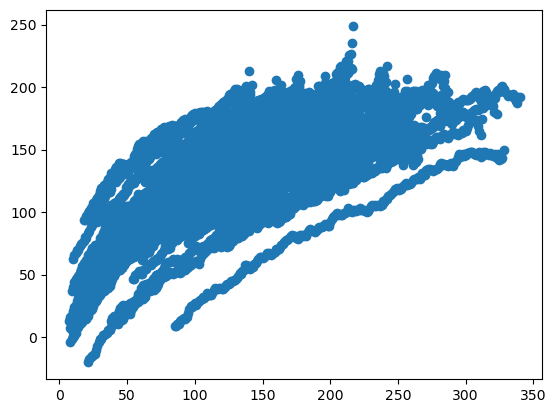

In [95]:
plt.scatter(FinalData['ytrue'], FinalData['ypred'])

# Model with Grid Search CV without group shuffle

In [ ]:
params = {'fit_intercept': [True, False]}
gsv_kfold = GridSearchCV(lr, param_grid = params, scoring=['r2','neg_root_mean_squared_error'], cv = 10, refit = 'r2')
gsv_kfold.fit(xtrain_data, ytrain_data, groups = engine_data)
gsv_kfold.cv_results_

In [74]:
gsv_kfold.best_score_, gsv_kfold.best_index_

(0.6432026812963676, 0)

In [75]:
best_model_kfold = gsv_kfold.best_estimator_
ypred = best_model_kfold.predict(xtest_data)
print('RMSE: ' + str(np.sqrt(mean_squared_error(ytest_data, ypred))))
print('R2: ' + str(r2_score(ytest_data, ypred)))

RMSE: 43.18821684634371
R2: 0.4637682883334361


# Linear Reg with log Transform

In [110]:
ytrain = ytrain_data.copy()
ytrain[ytrain == 0] = 1
ytest = ytest_data.copy()
ytest[ytest == 0] = 1
lr.fit(xtrain_data, np.round(np.log10(ytrain),3))
ypred = np.round(np.power(10, lr.predict(xtest_data)),0)
print('RMSE: ' + str(np.sqrt(mean_squared_error((ytest), ypred))))
print('R2: ' + str(r2_score((ytest), ypred)))

RMSE: 58.46822333447496
R2: 0.01720770830228946


In [111]:
ypred

array([[290.],
       [269.],
       [215.],
       ...,
       [ 18.],
       [ 17.],
       [ 16.]])

(array([ 596., 1177., 1828., 2952., 2884., 1975.,  978.,  453.,  174.,
          79.]),
 array([  7. ,  40.3,  73.6, 106.9, 140.2, 173.5, 206.8, 240.1, 273.4,
        306.7, 340. ]),
 <BarContainer object of 10 artists>)

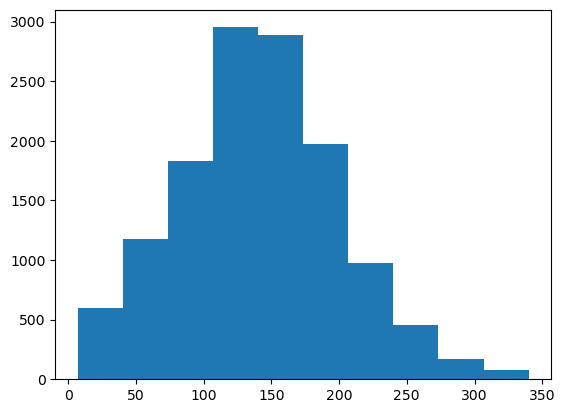

In [113]:
plt.hist(ytest_data['Remaining Cycles'], bins = 10)

# Logistic Regression

In [80]:
logr = LogisticRegression()
logr.fit(xtrain_data, ytrain_data)
ypred = logr.predict(xtest_data)
print('RMSE: ' + str(np.sqrt(mean_squared_error(ytest_data, ypred))))
print('R2: ' + str(r2_score(ytest_data, ypred)))

RMSE: 62.527156592519944
R2: -0.12398187123691629


# SGD Regression

In [84]:
sgd = SGDRegressor(penalty=None)
sgd.fit(xtrain_data, ytrain_data)
ypred = sgd.predict(xtest_data)
print('RMSE: ' + str(np.sqrt(mean_squared_error(ytest_data, ypred))))
print('R2: ' + str(r2_score(ytest_data, ypred)))

RMSE: 848013098381.5271
R2: -2.0674121676312383e+20


In [88]:
las = Lasso()
las.fit(xtrain_data, ytrain_data)
ypred = las.predict(xtest_data)
print('RMSE: ' + str(np.sqrt(mean_squared_error(ytest_data, ypred))))
print('R2: ' + str(r2_score(ytest_data, ypred)))

RMSE: 43.33334070554943
R2: 0.4601584720891071


In [89]:
params = {'alpha': [0.25, 0.5, 0.75, 1]}
gsv_kfold = GridSearchCV(las, param_grid = params, scoring=['r2','neg_root_mean_squared_error'], cv = 10, refit = 'r2')
gsv_kfold.fit(xtrain_data, ytrain_data, groups = engine_data)
gsv_kfold.cv_results_

{'mean_fit_time': array([1.83830428, 0.5906245 , 0.57380979, 0.54531724]),
 'std_fit_time': array([0.54391385, 0.11151421, 0.35965967, 0.33995761]),
 'mean_score_time': array([0.00797846, 0.00791543, 0.00156395, 0.00433559]),
 'std_score_time': array([0.0068183 , 0.0079206 , 0.00469186, 0.00668981]),
 'param_alpha': masked_array(data=[0.25, 0.5, 0.75, 1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.25}, {'alpha': 0.5}, {'alpha': 0.75}, {'alpha': 1}],
 'split0_test_r2': array([0.77951792, 0.78335632, 0.78380008, 0.78412452]),
 'split1_test_r2': array([0.77983465, 0.78293439, 0.78391359, 0.78483678]),
 'split2_test_r2': array([0.62435421, 0.62525461, 0.62548273, 0.62566733]),
 'split3_test_r2': array([0.75822049, 0.75945056, 0.76017749, 0.76085289]),
 'split4_test_r2': array([0.7995397 , 0.7980333 , 0.79764569, 0.7970962 ]),
 'split5_test_r2': array([0.59884149, 0.60039701, 0.60199811, 0.60354447]),
 'split6

In [90]:
best_las = gsv_kfold.best_estimator_
ypred = best_las.predict(xtest_data)
print('RMSE: ' + str(np.sqrt(mean_squared_error(ytest_data, ypred))))
print('R2: ' + str(r2_score(ytest_data, ypred)))

RMSE: 43.320364713377025
R2: 0.460481730371077


In [91]:
gsv_kfold.best_params_

{'alpha': 0.75}

# Polynomial Regression

In [96]:
from sklearn.preprocessing import PolynomialFeatures

In [103]:
pf = PolynomialFeatures(degree = 2)
xtrain_pf = pf.fit_transform(xtrain_data)
xtest_pf = pf.transform(xtest_data)
lr = LinearRegression()
lr.fit(xtrain_pf, ytrain_data)
ypred = lr.predict(xtest_pf)
print('RMSE: ' + str(np.sqrt(mean_squared_error(ytest_data, ypred))))
print('R2: ' + str(r2_score(ytest_data, ypred)))


RMSE: 42.838252900683855
R2: 0.47242349321394905


# Random Forest

In [117]:
rf = RandomForestRegressor()

In [118]:
rf.fit(xtrain_data, ytrain_data)
ypred = rf.predict(xtest_data)
print('RMSE: ' + str(np.sqrt(mean_squared_error(ytest_data, ypred))))
print('R2: ' + str(r2_score(ytest_data, ypred)))

RMSE: 47.3291893802016
R2: 0.35600858233028776
